In [1]:
from CustomPongEnv_v0_ram import Custom_Pong
import numpy as np

env = Custom_Pong()
states=env.observation_space.shape[0]
actions=env.action_space.n

In [2]:
def state_to_obs(state, streward):
    
    factor = 5
    
    ball_x = state[0]
    o1_float = ball_x/factor
    o1 = int(o1_float)

    ball_y = state[1] 
    o2_float = ball_y/factor
    o2 = int(o2_float)

    ball_vx = state[2]
    o3_float = ball_vx
    o3_i = int(o3_float)
    o3 = 0 if o3_i==2 else 1 


    ball_vy = state[3]
    o4_float = ball_vx
    o4_i = int(o4_float)
    o4 = 0 if o4_i==2 else 1 

    paddle_pos = state[4]
    o5_float = paddle_pos/factor
    o5 = int(o5_float)

    paddle_vel = state[5]
    o6_float = paddle_vel
    o6_i = int(o6_float)
    o6 = 0 if o6_i==4 else 1 
    
    o7 = int(reward)
    
    observation = [o1, o2, o3, o4, o5, o6, o7]
    
    return(observation)

In [3]:
x = []
episodes = 1

for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score=0
    while not done:
        env.render()
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        score += reward
        observation = state_to_obs(state, reward)
        x.append(observation)
        
    print('Episode:{} Score:{}'.format(episode, score))
    
env.close()

Episode:1 Score:-1


In [3]:
# s1_x = np.zeros((len(x)))
# s2_x = np.zeros((len(x)))
# s3_x = np.zeros((len(x)))
# s4_x = np.zeros((len(x)))
# s5_x = np.zeros((len(x)))
# s6_x = np.zeros((len(x)))

# for i in range(len(x)):
#     s1_x[i]=x[i][0]
#     s2_x[i]=x[i][1]
#     s3_x[i]=x[i][2]
#     s4_x[i]=x[i][3]
#     s5_x[i]=x[i][4]
#     s6_x[i]=x[i][5]
    

# a1=s1_x.max()
# b1=s1_x.min()
# a2=s2_x.max()
# b2=s2_x.min()
# a3=s3_x.max()
# b3=s3_x.min()
# a4=s4_x.max()
# b4=s4_x.min()
# a5=s5_x.max()
# b5=s5_x.min()
# a6=s6_x.max()
# b6=s6_x.min()

# print('Ball x')
# print(a1,b1, a1-b1, s1_x.mean())

# print('Ball y')
# print(a2,b2, a2-b2, s2_x.mean())

# print('Ball vx') # 2 values
# print(a3,b3, a3-b3, s3_x.mean())

# print('Ball vy') # 2 values
# print(a4,b4, a4-b4, s4_x.mean())

# print('Paddle pos') 
# print(a5,b5, a5-b5, s5_x.mean())

# print('Paddle vel') # 2 values
# print(a6,b6, a6-b6, s6_x.mean())

# Active Inference
## Setting up states and factors

In [4]:
import pymdp
from pymdp import utils
import numpy as np
from scipy.stats import dirichlet

C:\Users\aswin\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\aswin\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [5]:
# (Hidden)Factors
s1_size = 42

num_states = [s1_size]
num_factors = len(num_states)

# Rewards
reward_modes = 3 #Positive, negative, and zero

# Controls
s1_actions = ['Stay', 'Play-Up', 'Play-Down']

num_controls = [len(s1_actions)]

# Observations
o1_obs_size = 42
o2_obs_size = 42
o3_obs_size = 2
o4_obs_size = 2
o5_obs_size = 42
o6_obs_size = 2
reward_obs_size = reward_modes

num_obs = [o1_obs_size, o2_obs_size, o3_obs_size, o4_obs_size, o5_obs_size, o6_obs_size, reward_obs_size]
num_modalities = len(num_obs)

In [6]:
EPS_VAL = 1e-16 #negligibleconstant
# Likelhiood Dynamics
a = utils.random_A_matrix(num_obs, num_states) * 0 + EPS_VAL
A = utils.random_A_matrix(num_obs, num_states)

A[0].shape, A[1].shape, A[2].shape, A[3].shape, A[4].shape, A[5].shape, A[6].shape

((42, 42), (42, 42), (2, 42), (2, 42), (42, 42), (2, 42), (3, 42))

In [7]:
# Transisition dynamics
# Initialised as random becuase the agent need to learn the dynamics

B = utils.random_B_matrix(num_states, num_controls)
b = utils.random_B_matrix(num_states, num_controls) * 0 + EPS_VAL
B[0].shape

(42, 42, 3)

In [8]:
numS = num_states[0]
numA = num_controls[0]

for i in range(numS):
    A[0][:,i] = dirichlet.mean(a[0][:,i])
    A[1][:,i] = dirichlet.mean(a[1][:,i])
    A[2][:,i] = dirichlet.mean(a[2][:,i])
    A[3][:,i] = dirichlet.mean(a[3][:,i])
    A[4][:,i] = dirichlet.mean(a[4][:,i])
    A[5][:,i] = dirichlet.mean(a[5][:,i])
    A[6][:,i] = dirichlet.mean(a[6][:,i])
    for j in range(numA):
        B[0][:,i,j]=dirichlet.mean(b[0][:,i,j])

In [9]:
# Prior preferences for biasing the generative model to control behaviour

# The preferences are set uniform for all the hidden-states except the reward function
C = utils.obj_array_uniform(num_obs)

# Highest for the high-score and lowest for the lowscore
C_score = np.array([-3.9,0,3])
# Normalising the prior preference
C[6] = pymdp.maths.softmax(C_score)
C[6]

array([0.00095907, 0.04738039, 0.95166054])

In [10]:
D = utils.obj_array_uniform(num_states)

In [11]:
# Trials with active inference agent
T = 5
# Policies
policies = pymdp.control.construct_policies(num_states, num_controls, policy_len=T-1, control_fac_idx=None)

In [12]:
from scipy.stats import entropy

In [13]:
# Impractical time for simulations
qs = D
%time q_pol, efe = pymdp.control.update_posterior_policies(qs, A, B, C, policies, use_utility=True, use_states_info_gain=True, use_param_info_gain=False, pA=None, pB=None, E=None, gamma=16.0)

CPU times: total: 49min 33s
Wall time: 12min 50s


In [ ]:
q_pol, policies[1][0][0]

In [18]:
# Training A,B and D with EFE informed actions (PyMDP) is time intractable
# Training with random actions
e = []

training_episodes = 100

episodes = training_episodes
efe_list = []

qs = D
qs_prev = qs
for episode in range(1, episodes+1):
    
    print(episode)
    state = env.reset()
    done = False
    score = 0
    qs = D
    qs_prev = qs
    t = 0
    
    while not done:
           
        # env.render()
        # q_pol, efe = pymdp.control.update_posterior_policies(qs, A, B, C, policies, use_utility=True, use_states_info_gain=True, use_param_info_gain=False, pA=None, pB=None, E=None, gamma=16.0)
        # efe_list.append(efe)
        # action = np.random.choice([0,1,2], size=None, replace=True, p=q_pol)
        action = env.action_space.sample()  
        
        state, reward, done, info = env.step(action)
        score = reward
        
        observation = state_to_obs(state, reward)

        qs = pymdp.inference.update_posterior_states(A, observation, prior = D)
        
        if(t == 0):
            qs0 = qs

        pA = A
        pB = B
        pD = D
        
        # Learning
        A = pymdp.learning.update_obs_likelihood_dirichlet(pA, A, observation, qs, lr=1.0, modalities='all')
        
        actions = np.array([int(action)])
        B = pymdp.learning.update_state_likelihood_dirichlet(pB, B, actions, qs, qs_prev, lr=1.0, factors='all')
        
        e.append([ np.sum(entropy(A[0])), np.sum(entropy(A[1])), np.sum(entropy(A[2])), np.sum(entropy(A[3])), np.sum(entropy(A[4])), np.sum(entropy(A[5])), np.sum(entropy(A[6])), np.sum(entropy(B[0])) ])
        
        if(t == 0):
            D = pymdp.learning.update_state_prior_dirichlet(pD, qs0, lr=1.0, factors='all')
            D[0] = pymdp.maths.softmax(D[0])
        
        # End of episode i.e last action
        if(t == T-1):
            t = 0
            for i in range(numS):
                A[0][:,i] = dirichlet.mean(A[0][:,i])
                A[1][:,i] = dirichlet.mean(A[1][:,i])
                A[2][:,i] = dirichlet.mean(A[2][:,i])
                A[3][:,i] = dirichlet.mean(A[3][:,i])
                A[4][:,i] = dirichlet.mean(A[4][:,i])
                A[5][:,i] = dirichlet.mean(A[5][:,i])
                A[6][:,i] = dirichlet.mean(A[6][:,i])
                for j in range(numA):
                    B[0][:,i,j]=dirichlet.mean(B[0][:,i,j])

        qs_prev = qs
        
    #print('Episode:{} Score:{}'.format(episode, score))
    
env.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


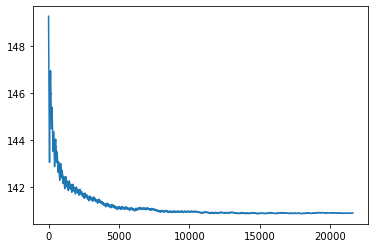

In [20]:
from matplotlib import pyplot as plt
x = np.array(e)
plt.plot(x[:,0])

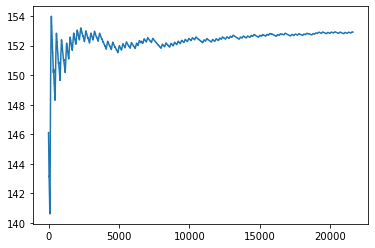

In [21]:
plt.plot(x[:,1])

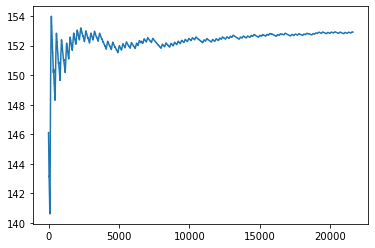

In [22]:
plt.plot(x[:,1])

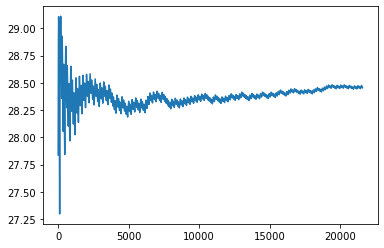

In [23]:
plt.plot(x[:,3])

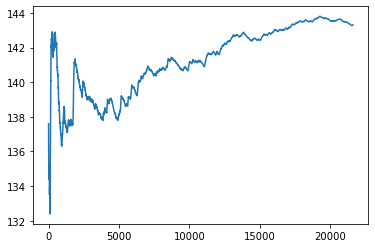

In [24]:
plt.plot(x[:,4])

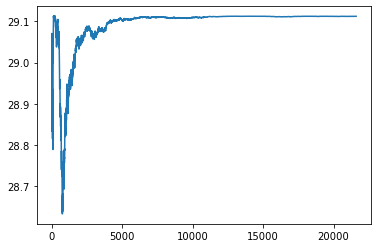

In [25]:
plt.plot(x[:,5])

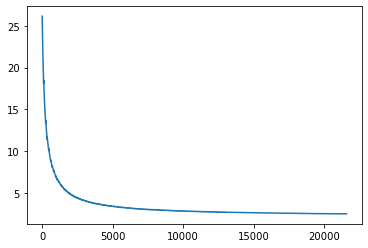

In [26]:
plt.plot(x[:,6])

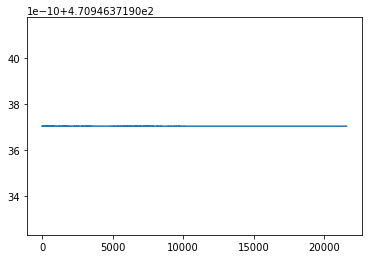

In [27]:
plt.plot(x[:,7])